In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
''' 이 코드가 수정한 코드'''
os.chdir('/content/drive/Shareddrives/RPCs/2017') #set directory path
file_list = glob.glob('*.csv') #load name list .csv

''' #load all file in path
for file_name in file_list:
  csv_test1 = pd.read_csv(file_list, header =None)  #set path
'''
#Train data: dpid_381_2017.csv
csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_320_2017.csv", header =None)  #set path
csv_test1.columns= ['Imon_change_date', 'Imon', 'Vmon', 'inst_lumi', 'lumi_start_date','lumi_end_date', 'Imon_change_date2', 'uxc_change_date', 'temp',
      'press', 'relative_humodity', 'dew_point'] #set label
# change dtype of _date from char to datetime(pandas)
csv_test1['Imon_change_date']= pd.to_datetime(csv_test1['Imon_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_start_date']= pd.to_datetime(csv_test1['lumi_start_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_end_date']= pd.to_datetime(csv_test1['lumi_end_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['Imon_change_date2']= pd.to_datetime(csv_test1['Imon_change_date2'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['uxc_change_date']= pd.to_datetime(csv_test1['uxc_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['inst_lumi']=pd.to_numeric(csv_test1['inst_lumi'], errors='coerce', downcast='float') #if dtype is not number, convert to nan

csv_test1.dropna(0,how='any',inplace=True)

null_data = csv_test1[csv_test1['inst_lumi']==('None') ] #find None data

for i in null_data.index:
    csv_test1.drop(csv_test1.index[i], inplace=True)
    for j in range(len(null_data.index)):
      csv_test1.drop(csv_test1.index[null_data.index[j]], inplace=True) # I don't know wht this working...


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


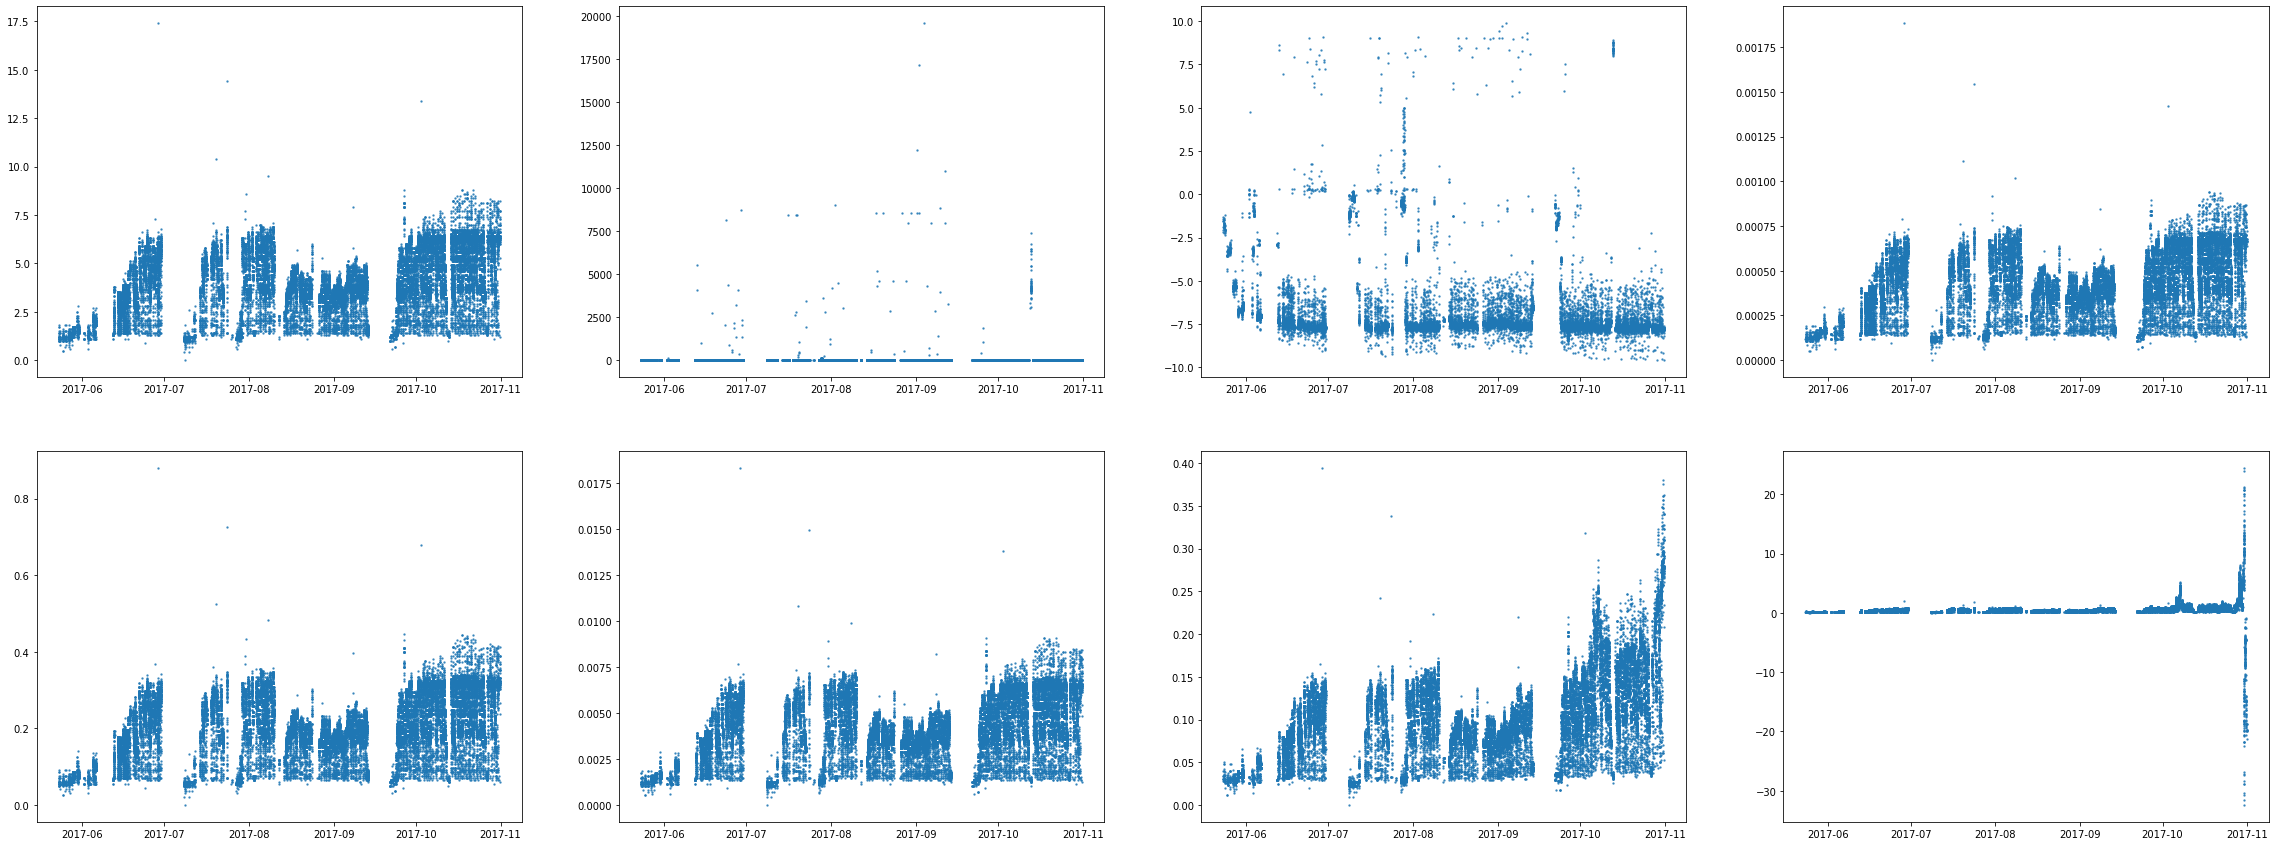

<Figure size 1440x504 with 0 Axes>

In [ ]:
os.chdir('/content/drive/Shareddrives/RPCs/2017')
file_list = glob.glob('*.csv')

csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_3270_2017.csv", header =None)
csv_test1.columns= ['Imon_change_date', 'Imon', 'Vmon', 'inst_lumi', 'lumi_start_date','lumi_end_date', 'Imon_change_date2', 'uxc_change_date', 'temp',
      'press', 'relative_humodity', 'dew_point']
csv_test1['Imon_change_date']= pd.to_datetime(csv_test1['Imon_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_start_date']= pd.to_datetime(csv_test1['lumi_start_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_end_date']= pd.to_datetime(csv_test1['lumi_end_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['Imon_change_date2']= pd.to_datetime(csv_test1['Imon_change_date2'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['uxc_change_date']= pd.to_datetime(csv_test1['uxc_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
delta_series = np.abs(csv_test1["lumi_start_date"]-csv_test1["lumi_end_date"])
delta_time = delta_series.convert_dtypes('to_numeric')



fig, axes = plt.subplots(2, 4)
fig.patch.set_facecolor('w')
plt.figure(figsize=(20,7))
fig.set_size_inches((40, 15)) 

axes[0,0].scatter(csv_test1['Imon_change_date'], csv_test1['Imon'], alpha=0.7, s=2)
axes[0,1].scatter(csv_test1['Imon_change_date'], csv_test1['Imon']/csv_test1['inst_lumi'], alpha=0.7, s=2)
axes[0,2].scatter(csv_test1['Imon_change_date'], np.log(csv_test1['Imon']/csv_test1['inst_lumi']), alpha=0.7, s=2)
axes[0,3].scatter(csv_test1['Imon_change_date'], csv_test1['Imon']/ csv_test1['Vmon'], alpha=0.7, s=2)
axes[1,0].scatter(csv_test1['Imon_change_date'], csv_test1['Imon']/csv_test1['temp'], alpha=0.7, s=2)
axes[1,1].scatter(csv_test1['Imon_change_date'],csv_test1['Imon']/ csv_test1['press'], alpha=0.7, s=2)
axes[1,2].scatter(csv_test1['Imon_change_date'], csv_test1['Imon']/csv_test1['relative_humodity'], alpha=0.7, s=2)
axes[1,3].scatter(csv_test1['Imon_change_date'],csv_test1['Imon']/ csv_test1['dew_point'], alpha=0.7, s=2)
#axes[1,2].scatter(csv_test1['Imon_change_date'],csv_test1['Imon']/ csv_test1['press'], alpha=0.7, s=2)
#axes[1,3].scatter(csv_test1['Imon_change_date'],delta_time, alpha=0.7, s=2)


#plt.savefig('../../assets/images/markdown_img/pl_subplot_180515.svg')
plt.show()


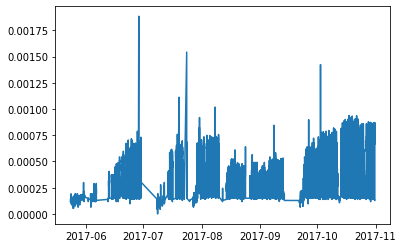

In [ ]:
plt.plot(csv_test1['Imon_change_date'],csv_test1['Imon']/ csv_test1['Vmon'])
#plt.ylim((1e-2,1e-6))
#plt.yscale('log')
plt.show()

In [ ]:
csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_3270_2017.csv", header =None)
csv_test1.columns= ['Imon_change_date', 'Imon', 'Vmon', 'inst_lumi', 'lumi_start_date','lumi_end_date', 'Imon_change_date2', 'uxc_change_date', 'temp',
      'press', 'relative_humodity', 'dew_point']
csv_test1['Imon_change_date']= pd.to_datetime(csv_test1['Imon_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_start_date']= pd.to_datetime(csv_test1['lumi_start_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_end_date']= pd.to_datetime(csv_test1['lumi_end_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['Imon_change_date2']= pd.to_datetime(csv_test1['Imon_change_date2'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['uxc_change_date']= pd.to_datetime(csv_test1['uxc_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

csv_test1

,Imon_change_date,Imon,Vmon,inst_lumi,lumi_start_date,lumi_end_date,Imon_change_date2,uxc_change_date,temp,press,relative_humodity,dew_point
0,2017-05-23 14:26:30,1.1,9386,9.623232,2017-05-23 14:26:30,2017-05-23 14:26:53,2017-05-23 14:26:30,2017-05-23 12:25:39,19.74,968.42,35.55,6.26
1,2017-05-23 15:42:03,1.4,9386,5.276613,2017-05-23 15:41:45,2017-05-23 15:42:08,2017-05-23 15:42:03,2017-05-23 15:12:22,19.77,967.47,35.55,6.62
2,2017-05-23 15:42:16,1.1,9386,5.271550,2017-05-23 15:42:08,2017-05-23 15:42:31,2017-05-23 15:42:16,2017-05-23 15:12:22,19.77,967.47,35.55,6.62
3,2017-05-23 16:16:23,1.1,9385,5.031915,2017-05-23 16:16:00,2017-05-23 16:16:24,2017-05-23 16:16:23,2017-05-23 15:12:22,19.77,967.47,35.55,6.62
4,2017-05-23 16:42:23,1.2,9385,4.855299,2017-05-23 16:42:13,2017-05-23 16:42:36,2017-05-23 16:42:23,2017-05-23 15:12:22,19.77,967.47,35.55,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...
42646,2017-10-31 16:16:04,6.4,9420,15100.547852,2017-10-31 16:15:48,2017-10-31 16:16:11,2017-10-31 16:16:04,2017-10-31 16:15:55,19.77,972.09,22.97,-0.32
42647,2017-10-31 16:16:33,6.0,9420,14971.691406,2017-10-31 16:16:11,2017-10-31 16:16:34,2017-10-31 16:16:33,2017-10-31 16:15:55,19.77,972.09,22.97,-0.32
42648,2017-10-31 16:16:37,6.3,9420,14912.967773,2017-10-31 16:16:34,2017-10-31 16:16:58,2017-10-31 16:16:37,2017-10-31 16:15:55,19.77,972.09,22.97,-0.32
42649,2017-10-31 16:16:54,6.3,9417,14912.967773,2017-10-31 16:16:34,2017-10-31 16:16:58,2017-10-31 16:16:54,2017-10-31 16:16:47,19.77,972.09,22.97,-0.32


In [ ]:
  a = np.abs(csv_test1["lumi_start_date"]-csv_test1["lumi_end_date"])

In [ ]:
a.convert_dtypes('to_numeric')

0        2.300000e+10
1        2.300000e+10
2        2.300000e+10
3        2.400000e+10
4        2.300000e+10
             ...     
42646    2.300000e+10
42647    2.300000e+10
42648    2.400000e+10
42649    2.400000e+10
42650    2.300000e+10
Length: 42651, dtype: float64

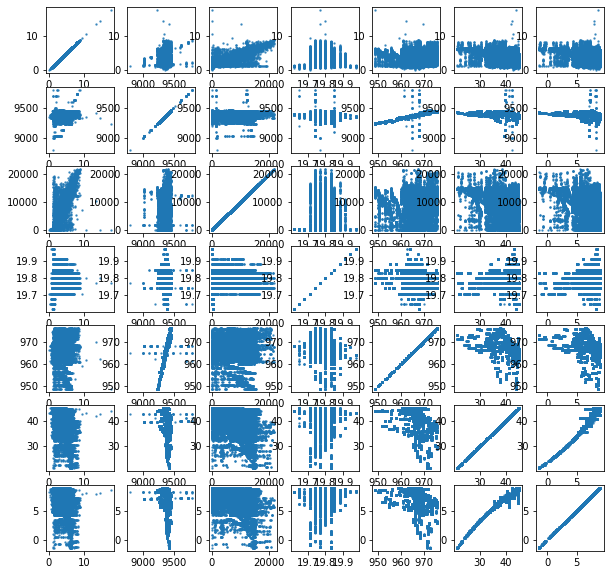

In [ ]:

csv_test1 = pd.read_csv("/content/drive/Shareddrives/RPCs/2017/dpid_3270_2017.csv", header =None)
csv_test1.columns= ['Imon_change_date', 'Imon', 'Vmon', 'inst_lumi', 'lumi_start_date','lumi_end_date', 'Imon_change_date2', 'uxc_change_date', 'temp',
      'press', 'relative_humodity', 'dew_point']
csv_test1['Imon_change_date']= pd.to_datetime(csv_test1['Imon_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_start_date']= pd.to_datetime(csv_test1['lumi_start_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['lumi_end_date']= pd.to_datetime(csv_test1['lumi_end_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['Imon_change_date2']= pd.to_datetime(csv_test1['Imon_change_date2'], format='%Y-%m-%d %H:%M:%S', errors='raise')
csv_test1['uxc_change_date']= pd.to_datetime(csv_test1['uxc_change_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
delta_series = np.abs(csv_test1["lumi_start_date"]-csv_test1["lumi_end_date"])
delta_time = delta_series.convert_dtypes('to_numeric')

fig, axes = plt.subplots(7, 7)
fig.patch.set_facecolor('w')

fig.set_size_inches((10, 10)) 



csv_test1_label= [ 'Imon', 'Vmon', 'inst_lumi', 'temp', 'press', 'relative_humodity', 'dew_point']

num = csv_test1_label

for i in range(len(num)):
  for j in  range(len(num)):
     axes[i,j].scatter(csv_test1[num[j]], csv_test1[num[i]], alpha=0.7, s=2)



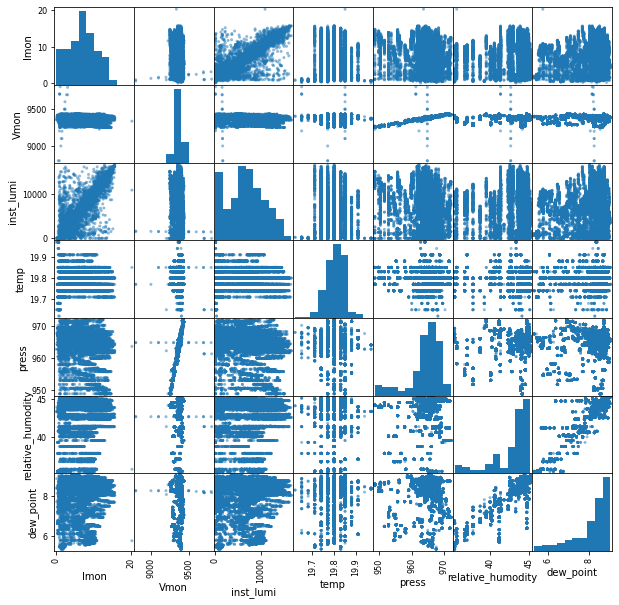

In [ ]:

from pandas.plotting import scatter_matrix

scatter_matrix(csv_test1, 
              

               alpha=0.5, 

               figsize=(10, 10), 

               diagonal='hist',


               )


plt.savefig('/content/drive/MyDrive/data img/img.jpg')
plt.show()









